In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an


#from scipy.optimize import curve_fit


main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydraulic/nofluxes/N1000/ell100/ca1e-4/'

In [2]:
nsim = 20

In [3]:
Nt = {}

for n in range(nsim) :
    Nt[n] = np.loadtxt(os.path.join(main_dir, 'run'+str(n).zfill(4), 'sim_nlum.dat'))

In [4]:
ellt = {}

for n in range(nsim) :
    ellt[n] = np.loadtxt(os.path.join(main_dir, 'run'+str(n).zfill(4), 'sim_ell_avg.dat'))

In [5]:
Lt = {}

for n in range(nsim) :
    Lt[n] = np.loadtxt(os.path.join(main_dir, 'run'+str(n).zfill(4), 'sim_L_avg.dat'))

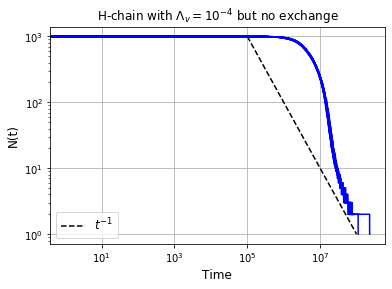

In [6]:
plt.xscale('log')
plt.yscale('log')

for n in range(nsim) :
    plt.plot(Nt[n][:, 0], Nt[n][:, 1], color='b')


k, a = 1e8, -1.
t = np.logspace(5, 8, 101)
plt.plot(t, k*t**a, label=r'$t^{-1}$', linestyle='--', color='k')

#plt.xlim(1e5, 5e8)
plt.xlabel('Time', fontsize=12)
plt.ylabel('N(t)', fontsize=12)
plt.title(r'H-chain with $\Lambda_v=10^{-4}$ but no exchange')
plt.legend(fontsize=12, loc=3)
plt.grid()
plt.show()

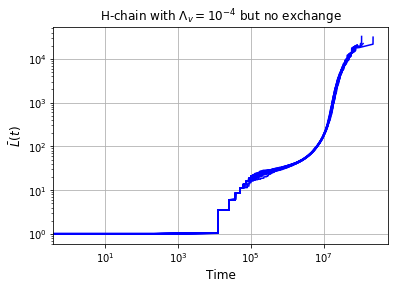

In [7]:
plt.xscale('log')
plt.yscale('log')

for n in range(nsim) :
    plt.plot(Lt[n][:, 0], Lt[n][:, 1], color='b')


#k, a = 1e8, -1.
#t = np.logspace(5, 8, 101)
#plt.plot(t, k*t**a, label=r'$t^{-1}$', linestyle='--', color='k')

#plt.xlim(1e5, 5e8)
plt.xlabel('Time', fontsize=12)
plt.ylabel(r'$\bar{L}(t)$', fontsize=12)
plt.title(r'H-chain with $\Lambda_v=10^{-4}$ but no exchange')

plt.grid()
plt.show()

In [8]:
def find_local_min(t, f, tmin=0., tmax=1.):
    step_min, step_max = np.argmin(np.abs(t-tmin)), np.argmin(np.abs(t-tmax))
    step = np.argmin(f[step_min:step_max])
    value = np.min(f[step_min:step_max])
    time = t[step]
    return step, time, value

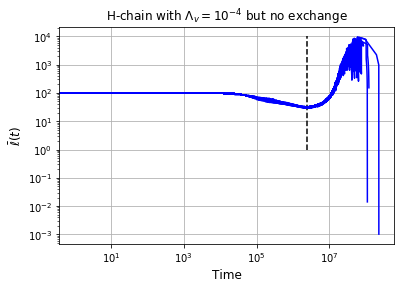

In [9]:
plt.xscale('log')
plt.yscale('log')

step_list = []
value_list = []
time_list = []

for n in range(nsim) :
    plt.plot(ellt[n][:, 0], ellt[n][:, 1], color='b')
    step, time, value = find_local_min(t=ellt[n][:, 0], f=ellt[n][:, 1], tmin=1e5, tmax=1e7)
    step_list += [step]
    value_list += [value]
    time_list += [time]

plt.vlines(x=np.average(time_list), ymin=1., ymax = 1e4, linestyle='--')

#plt.xlim(1e5, 5e8)
plt.xlabel('Time', fontsize=12)
plt.ylabel(r'$\bar{\ell}(t)$', fontsize=12)
plt.title(r'H-chain with $\Lambda_v=10^{-4}$ but no exchange')

plt.grid()
plt.show()

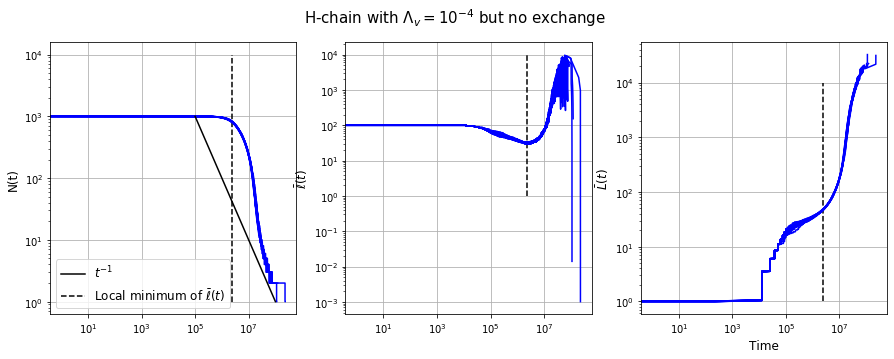

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for n in range(nsim) :
    ax[0].plot(Nt[n][:, 0], Nt[n][:, 1], color='b')
    ax[1].plot(ellt[n][:, 0], ellt[n][:, 1], color='b')
    ax[2].plot(Lt[n][:, 0], Lt[n][:, 1], color='b')
    

ax[0].vlines(x=np.average(time_list), ymin=1., ymax = 1e4, linestyle='--', label=r'Local minimum of $\bar{\ell}(t)$')
ax[1].vlines(x=np.average(time_list), ymin=1., ymax = 1e4, linestyle='--', label=r'Local minimum of $\bar{\ell}(t)$')
ax[2].vlines(x=np.average(time_list), ymin=1., ymax = 1e4, linestyle='--', label=r'Local minimum of $\bar{\ell}(t)$')
    
k, a = 1e8, -1.
t = np.logspace(5, 8, 101)
ax[0].plot(t, k*t**a, label=r'$t^{-1}$', color='k')

#plt.xlim(1e5, 5e8)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
#ax[0].set_xlabel('Time', fontsize=12)
ax[0].set_ylabel('N(t)', fontsize=12)
ax[0].legend(fontsize=12, loc=3)
ax[0].grid()

ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[1].set_ylabel(r'$\bar{\ell}(t)$', fontsize=12)
ax[1].grid()

ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('Time', fontsize=12)
ax[2].set_ylabel(r'$\bar{L}(t)$', fontsize=12)
#ax[0].legend(fontsize=12, loc=3)
ax[2].grid()

plt.suptitle(r'H-chain with $\Lambda_v=10^{-4}$ but no exchange', fontsize=15)
plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/H_chain_noexchange_pumping1e-4.png')
plt.show()